# 의사결정나무
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘


### 문제 정의
서울 지역(구)의 경도와 위도 정보를 사용하여    
임의로 입력된 지역(동)을 [강동, 강서, 강남, 강북]으로 분류

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../data/seoul_district.csv')
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [4]:
test_df = pd.read_csv('../data/seoul_dong.csv')
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [5]:
# label 개수 확인
train_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [6]:
test_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

### 데이터 전처리

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   district   20 non-null     object 
 1   longitude  20 non-null     float64
 2   latitude   20 non-null     float64
 3   label      20 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dong       20 non-null     object 
 1   longitude  20 non-null     float64
 2   latitude   20 non-null     float64
 3   label      20 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [7]:
# 경도와 위도의 평균과 편차
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [11]:
test_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.995297,37.549652
std,0.095166,0.051614
min,126.815719,37.483279
25%,126.954698,37.501336
50%,127.014838,37.545835
75%,127.060807,37.580557
max,127.137382,37.648446


> 경도와 위도는 동일한 단위를 사용   
> 의사결정나무는 각 특징을 독립적으로 사용하기 때문에 별다른 전처리 과정이 필요없음

### 데이터 시각화

In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [13]:
# train_df의 위도, 경도에 해당하는 label을 시각화하려고 한다.
import seaborn as sns

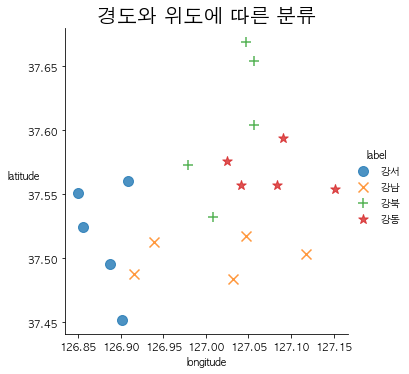

In [21]:
sns.lmplot(
    'longitude',
    'latitude',
    data=train_df,
    fit_reg=False, # 회귀선 여부
    scatter_kws={'s':100}, # 좌표상의 점 크기
    hue='label', # 대상값
    markers=['o','x','+','*'],
)

plt.title('경도와 위도에 따른 분류', size=20)
plt.xlabel('longitude', rotation=0)
plt.ylabel('latitude', rotation=0)

plt.show()

### 데이터 다듬기
- train_df에서 district 제거
- test_df에서 dong 제거
- X_train = 위도, 경도만
- y_train = label
- X_test = 위도, 경도만
- y_test = label

In [22]:
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [28]:
train_df.drop('district', axis=1)
test_df.drop('dong', axis=1)

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서
5,127.030720,37.508838,강남
6,127.057193,37.501163,강남
7,127.018281,37.486401,강남
8,126.988194,37.483279,강남
9,127.043159,37.492896,강남


In [24]:
X_train = train_df[['longitude', 'latitude']]
X_train.head()

,longitude,latitude
0,126.849500,37.551000
1,126.855396,37.524240
2,126.887400,37.495400
3,126.902000,37.451900
4,126.908728,37.560229


In [29]:
X_test = test_df[['longitude', 'latitude']]
X_test.head()

,longitude,latitude
0,126.854547,37.489853
1,126.859245,37.501394
2,126.847951,37.537759
3,126.815719,37.575817
4,126.891620,37.577039


In [32]:
y_train = train_df.label
y_test = test_df.label
print(y_train.head(),y_test.head())

0    강서
1    강서
2    강서
3    강서
4    강서
Name: label, dtype: object 0    강서
1    강서
2    강서
3    강서
4    강서
Name: label, dtype: object


In [35]:
# len(X_train) == len(y_train)
len(X_test) == len(y_test)

True

In [41]:
# 의사결정나무로 학습 (random_state = 35)
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=35)

In [42]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=35)

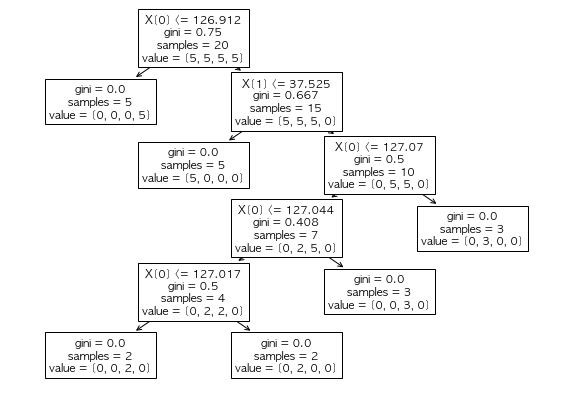

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))

plot_tree(dt_clf)

plt.show()

> gini : 불순도   

In [43]:
dt_clf.score(X_test, y_test)

0.95

In [44]:
from sklearn import metrics

In [51]:
print(metrics.classification_report(y_test, dt_clf.predict(X_test)))

              precision    recall  f1-score   support

          강남       1.00      1.00      1.00         5
          강동       0.83      1.00      0.91         5
          강북       1.00      0.80      0.89         5
          강서       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

